### Project Description: Twitter US Airline Sentiment
Data Description:   
A sentiment analysis job about the problems of each major U.S. airline. Twitter data was scraped from
February of 2015 and contributors were asked to first classify positive, negative, and neutral tweets, followed
by categorizing negative reasons (such as "late flight" or "rude service").

## 1. Import the libraries, load dataset, print shape of data, data description. 


In [1]:
#Import all the necessary modules
import warnings
warnings.filterwarnings('ignore')
import re
from bs4 import BeautifulSoup

import re
import numpy as np                                  #for large and multi-dimensional arrays
import pandas as pd                                 #for data manipulation and analysis
import nltk                                         #Natural language processing tool-kit

nltk.download('stopwords')
nltk.download('punkt')

from nltk.corpus import stopwords                   #Stopwords corpus
# Stemmer
from nltk.tokenize import word_tokenize 
# NLTK
from nltk.stem import WordNetLemmatizer, PorterStemmer, SnowballStemmer
from nltk.corpus import wordnet
import seaborn as sns


from sklearn.feature_extraction.text import CountVectorizer          #For Bag of words
from sklearn.feature_extraction.text import TfidfVectorizer          #For TF-IDF

import numpy as np 
import collections
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier

from sklearn.linear_model import LogisticRegression


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/vgupta/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/vgupta/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
data = pd.read_csv('Tweets.csv')

In [3]:
data.shape

(14640, 15)

In [4]:
data.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [5]:
data.describe()

,tweet_id,airline_sentiment_confidence,negativereason_confidence,retweet_count
count,1.464000e+04,14640.000000,10522.000000,14640.000000
mean,5.692184e+17,0.900169,0.638298,0.082650
std,7.791112e+14,0.162830,0.330440,0.745778
min,5.675883e+17,0.335000,0.000000,0.000000
25%,5.685592e+17,0.692300,0.360600,0.000000
50%,5.694779e+17,1.000000,0.670600,0.000000
75%,5.698905e+17,1.000000,1.000000,0.000000
max,5.703106e+17,1.000000,1.000000,44.000000


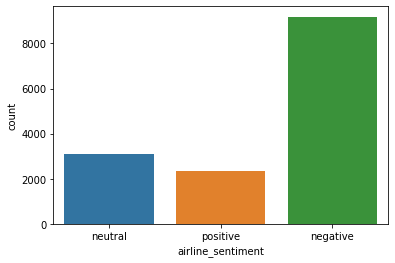

In [6]:
sns.countplot(x='airline_sentiment', data=data)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

In [8]:
data['airline_sentiment'].value_counts()

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64

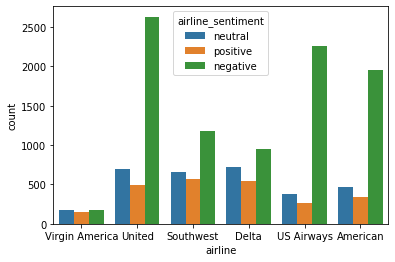

In [9]:
sns.countplot(x='airline', hue="airline_sentiment", data=data)

## 2. Understand of data-columns: 
a. Drop all other columns except “text” and “airline_sentiment”.  
b. Check the shape of data.  
c. Print first 5 rows of data.  


In [10]:
data.shape

(14640, 15)

In [11]:
# drop rows with confidence less then 60%
data = data[data['airline_sentiment_confidence'] > 0.6]

In [12]:
data.shape

(14402, 15)

In [13]:
tweets = data[['text', 'airline_sentiment']]
tweets.head()

,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
2,@VirginAmerica I didn't today... Must mean I n...,neutral
3,@VirginAmerica it's really aggressive to blast...,negative
4,@VirginAmerica and it's a really big bad thing...,negative
5,@VirginAmerica seriously would pay $30 a fligh...,negative


In [14]:
tweets.shape

(14402, 2)

In [15]:

X = tweets.iloc[:, 0].values  
y = tweets.iloc[:, 1].values

In [16]:
X

array(['@VirginAmerica What @dhepburn said.',
       "@VirginAmerica I didn't today... Must mean I need to take another trip!",
       '@VirginAmerica it\'s really aggressive to blast obnoxious "entertainment" in your guests\' faces &amp; they have little recourse',
       ...,
       '@AmericanAir Please bring American Airlines to #BlackBerry10',
       "@AmericanAir you have my money, you change my flight, and don't answer your phones! Any other suggestions so I can make my commitment??",
       '@AmericanAir we have 8 ppl so we need 2 know how many seats are on the next flight. Plz put us on standby for 4 people on the next flight?'],
      dtype=object)

In [17]:
y

array(['neutral', 'neutral', 'negative', ..., 'neutral', 'negative',
       'neutral'], dtype=object)

## 3. Text pre-processing: Data preparation.
a. Html tag removal.   
b. Tokenization.  
c. Remove the numbers.  
d. Removal of Special Characters and Punctuations.  
e. Conversion to lowercase.  
f. Lemmatize or stemming.  
g. Join the words in the list to convert back to text string in the dataframe. (So that each row
contains the data in text format.)  
h. Print first 5 rows of data after pre-processing.  


In [18]:
# Initialize Poster Stemmer
ps = PorterStemmer()

# Function to perform Poster Stemmer
def _PosterStemmer(review):
    return ' '.join([ps.stem(word) for word in nltk.word_tokenize(review)])


In [19]:
processed_tweets = []
 
for tweet in range(0, len(X)):  
    
    #html tag removal
    soup = BeautifulSoup(str(X[tweet]))
    processed_tweet = soup.get_text()
    
    # Remove tweet account name
    processed_tweet = re.sub(r'@\w+', ' ', processed_tweet)
 

    # Remove numbers
    processed_tweet = re.sub('\d+', ' ', processed_tweet)
    
    # remove all single characters
    processed_tweet = re.sub(r'\s+[a-zA-Z]\s+', ' ', processed_tweet)
 
    # Remove single characters from the start
    processed_tweet = re.sub(r'\^[a-zA-Z]\s+', ' ', processed_tweet) 
 
    # Substituting multiple spaces with single space
    processed_tweet= re.sub(r'\s+', ' ', processed_tweet, flags=re.I)
 

    # Remove special characters
    processed_tweet = re.sub(r"[^A-Za-z0-9']+", ' ', processed_tweet) 
 
    # Converting to Lowercase
    processed_tweet = processed_tweet.lower()
    
    # perform Poster Stemmer and tokenization
    processed_tweet = _PosterStemmer(processed_tweet);
    processed_tweets.append(processed_tweet)

In [20]:
# Print first 5 rows of data after pre-processing.
processed_tweets[:5]

['what said',
 "did n't today must mean need to take anoth trip",
 "it 's realli aggress to blast obnoxi entertain in your guest ' face they have littl recours",
 "and it 's realli big bad thing about it",
 "serious would pay flight for seat that did n't have thi play it 's realli the onli bad thing about fli va"]

## 4. Vectorization: 
a. Use CountVectorizer.  
b. Use TfidfVectorizer.  


### CountVectorizer

In [21]:
# cv = CountVectorizer()
# cv_X = cv.fit_transform(processed_tweets)

# print(cv_X.shape)
# print(type(cv_X))
# print(cv_X.toarray())


In [22]:
# create the transform
vectorizer = CountVectorizer()
# tokenize and build vocab
vectorizer.fit(processed_tweets)
# summarize
print('CountVectorizer Vocab size', len(vectorizer.vocabulary_))
# encode document
cv_X = vectorizer.transform(processed_tweets)
# summarize encoded vector
print(cv_X.shape)
print(type(cv_X))
print(cv_X.toarray())

CountVectorizer Vocab size 10024
(14402, 10024)
<class 'scipy.sparse.csr.csr_matrix'>
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [23]:
#TfidfVectorizer

In [24]:
#tfidfconverter = TfidfVectorizer(max_features=2000, min_df=5, max_df=0.7, stop_words=stopwords.words('english')) 
tfidfconverter = TfidfVectorizer() 

In [25]:
tfidfconverter.fit(processed_tweets)
# summarize
print('Tfidfconverter Vocab size', len(tfidfconverter.vocabulary_))
# encode document
tfid_X = tfidfconverter.transform(processed_tweets)
# summarize encoded vector
print(tfid_X.shape)
print(type(tfid_X))
print(tfid_X.toarray())


Tfidfconverter Vocab size 10024
(14402, 10024)
<class 'scipy.sparse.csr.csr_matrix'>
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


## 5. Fit and evaluate model using both type of vectorization. (6+6 Marks)


In [26]:
# Function to plot confusion matrix 
def plot_confusion_matrix(y_true, y_pred, classes, normalize=False, title=None, cmap=plt.cm.Blues):
    cm = confusion_matrix(y_true, y_pred)
    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]), yticks=np.arange(cm.shape[0]), xticklabels=classes, yticklabels=classes, title=title, ylabel='True label', xlabel='Predicted label')
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
    thresh = cm.max() / 2.0
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], 'd'),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

## TfidfVectorizer- RandomForestClassifier

In [27]:
print ("=====TfidfVectorizer == RandomForestClassifier")
X_train, X_test, y_train, y_test = train_test_split(tfid_X, y, test_size=0.2, random_state=0)
 
text_classifier = RandomForestClassifier(n_estimators=100, random_state=0)  
text_classifier.fit(X_train, y_train)
 
predictions = text_classifier.predict(X_test)
 


=====TfidfVectorizer == RandomForestClassifier


Classification Report :
               precision    recall  f1-score   support

    negative       0.76      0.97      0.85      1816
     neutral       0.69      0.38      0.49       595
    positive       0.90      0.47      0.61       470

    accuracy                           0.77      2881
   macro avg       0.78      0.61      0.65      2881
weighted avg       0.77      0.77      0.74      2881

Model Accuracy: 0.7657063519611246
[[1761   49    6]
 [ 350  226   19]
 [ 199   52  219]]
              precision    recall  f1-score   support

    negative       0.76      0.97      0.85      1816
     neutral       0.69      0.38      0.49       595
    positive       0.90      0.47      0.61       470

    accuracy                           0.77      2881
   macro avg       0.78      0.61      0.65      2881
weighted avg       0.77      0.77      0.74      2881

0.7657063519611246


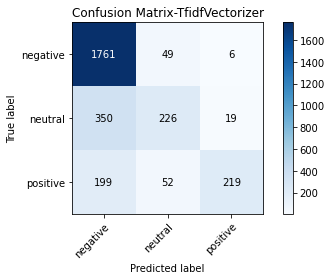

In [28]:
print("Classification Report :\n {}".format(classification_report(y_test,predictions)))
print("Model Accuracy: {}".format(accuracy_score(y_test, predictions)))
 # Print the Confusion Matrix
plot_confusion_matrix(y_test, predictions, classes=['negative','neutral','positive'], title='Confusion Matrix-TfidfVectorizer')
   
print(confusion_matrix(y_test,predictions))  
print(classification_report(y_test,predictions))  
print(accuracy_score(y_test, predictions))

## TfidfVectorizer- LogisticRegression

=====TfidfVectorizer == LogisticRegression
Classification Report :
               precision    recall  f1-score   support

    negative       0.81      0.95      0.88      1816
     neutral       0.69      0.49      0.57       595
    positive       0.87      0.63      0.73       470

    accuracy                           0.80      2881
   macro avg       0.79      0.69      0.73      2881
weighted avg       0.80      0.80      0.79      2881

Model Accuracy: 0.801457827143353
[[1720   78   18]
 [ 273  294   28]
 [ 118   57  295]]
              precision    recall  f1-score   support

    negative       0.81      0.95      0.88      1816
     neutral       0.69      0.49      0.57       595
    positive       0.87      0.63      0.73       470

    accuracy                           0.80      2881
   macro avg       0.79      0.69      0.73      2881
weighted avg       0.80      0.80      0.79      2881

0.801457827143353


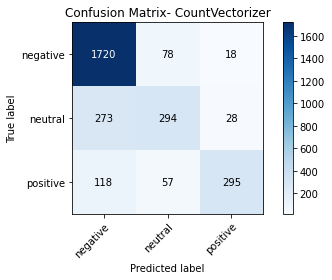

In [29]:
print ("=====TfidfVectorizer == LogisticRegression")
text_classifier = LogisticRegression()  
text_classifier.fit(X_train, y_train)

predictions = text_classifier.predict(X_test)
 
print("Classification Report :\n {}".format(classification_report(y_test,predictions)))
print("Model Accuracy: {}".format(accuracy_score(y_test, predictions)))
 # Print the Confusion Matrix
plot_confusion_matrix(y_test, predictions, classes=['negative','neutral','positive'], title='Confusion Matrix- CountVectorizer')
   
print(confusion_matrix(y_test,predictions))  
print(classification_report(y_test,predictions))  
print(accuracy_score(y_test, predictions))

## CountVectorizer- RandomForestClassifier

=====CountVectorizer == RandomForestClassifier
Classification Report :
               precision    recall  f1-score   support

    negative       0.78      0.97      0.86      1816
     neutral       0.72      0.41      0.52       595
    positive       0.87      0.54      0.67       470

    accuracy                           0.78      2881
   macro avg       0.79      0.64      0.68      2881
weighted avg       0.78      0.78      0.76      2881

Model Accuracy: 0.781673030197848
[[1753   51   12]
 [ 324  244   27]
 [ 173   42  255]]
              precision    recall  f1-score   support

    negative       0.78      0.97      0.86      1816
     neutral       0.72      0.41      0.52       595
    positive       0.87      0.54      0.67       470

    accuracy                           0.78      2881
   macro avg       0.79      0.64      0.68      2881
weighted avg       0.78      0.78      0.76      2881

0.781673030197848


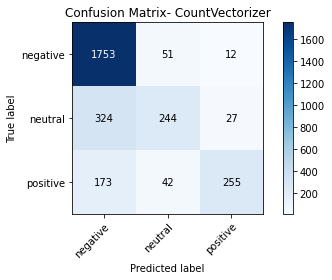

In [30]:
print ("=====CountVectorizer == RandomForestClassifier")
X_train, X_test, y_train, y_test = train_test_split(cv_X, y, test_size=0.2, random_state=0)

text_classifier = RandomForestClassifier(n_estimators=100, random_state=0)  
text_classifier.fit(X_train, y_train)

predictions = text_classifier.predict(X_test)
 
print("Classification Report :\n {}".format(classification_report(y_test,predictions)))
print("Model Accuracy: {}".format(accuracy_score(y_test, predictions)))
 # Print the Confusion Matrix
plot_confusion_matrix(y_test, predictions, classes=['negative','neutral','positive'], title='Confusion Matrix- CountVectorizer')
   
print(confusion_matrix(y_test,predictions))  
print(classification_report(y_test,predictions))  
print(accuracy_score(y_test, predictions))

## CountVectorizer- LogisticRegression

=====CountVectorizer == LogisticRegression
Classification Report :
               precision    recall  f1-score   support

    negative       0.86      0.90      0.88      1816
     neutral       0.64      0.59      0.62       595
    positive       0.81      0.73      0.77       470

    accuracy                           0.81      2881
   macro avg       0.77      0.74      0.75      2881
weighted avg       0.81      0.81      0.81      2881

Model Accuracy: 0.8101353696633113
[[1640  142   34]
 [ 198  352   45]
 [  73   55  342]]
              precision    recall  f1-score   support

    negative       0.86      0.90      0.88      1816
     neutral       0.64      0.59      0.62       595
    positive       0.81      0.73      0.77       470

    accuracy                           0.81      2881
   macro avg       0.77      0.74      0.75      2881
weighted avg       0.81      0.81      0.81      2881

0.8101353696633113


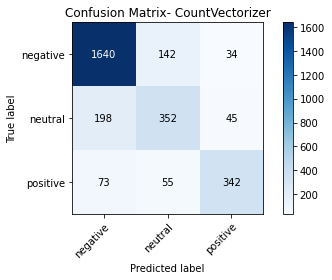

In [31]:
print ("=====CountVectorizer == LogisticRegression")
text_classifier = LogisticRegression()  
text_classifier.fit(X_train, y_train)

predictions = text_classifier.predict(X_test)
 
print("Classification Report :\n {}".format(classification_report(y_test,predictions)))
print("Model Accuracy: {}".format(accuracy_score(y_test, predictions)))
 # Print the Confusion Matrix
plot_confusion_matrix(y_test, predictions, classes=['negative','neutral','positive'], title='Confusion Matrix- CountVectorizer')
   
print(confusion_matrix(y_test,predictions))  
print(classification_report(y_test,predictions))  
print(accuracy_score(y_test, predictions))

## 6. Summarize your understanding of the application of Various Pre-processing and Vectorization and performance of your model on this dataset. 

Text preprocessing is  an important step for natural language processing (NLP) tasks. It transforms text into a more digestible form so that machine learning algorithms can perform better

There are 3 main steps of text preprocessing:
* Tokenization is about splitting strings of text into smaller pieces, or “tokens”. Paragraphs can be tokenized into sentences and sentences can be tokenized into words. 
* Normalization aims to put all text on a level playing field, e.g., converting all characters to lowercase. 
* Noise removal cleans up the text, e.g., remove extra whitespaces.

After pre-processing, the input data is transformed in predictable and analyzable text.

We have used CountVectorizer and TfidfVectorizer for feature extraction for given data.

<b>In given data, CountVectorizer with Logistic Regression gives accuracy of 81 % and TfidfVectorizer with Logistic Regression gives accuracy of 80%. With given data, CountVectorizer give some better accuracy as vocab is limited. </b> 

TfidfVectorizer will give you better performance than CountVectorizer as the size of the vocabulary increases. As the size of the vocabulary increases, TfidfVectorizer would be better able to differentiate rare words and commonly occurring words while Countvectorizer would still give equal weight to all words which is undesirable.